In [1]:
# Pkg.add("DataFrames")
using DataFrames
using Plots

INFO: Recompiling stale cache file C:\Users\jtapp\.julia\lib\v0.6\SortingAlgorithms.ji for module SortingAlgorithms.
INFO: Recompiling stale cache file C:\Users\jtapp\.julia\lib\v0.6\DataFrames.ji for module DataFrames.


In [2]:
cd("./data")
data = readtable("bitcoin_dataset.csv");
head(data)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,btc_difficulty,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
1,2009-01-03 00:00:00,0.0,50.0,0.0,0.0,0.0,0.000285,0.0,1.0,0.0,4.97102696296e-8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,50.0,0.0,0.0
2,2009-01-05 00:00:00,0.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-07 00:00:00,0.0,50.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2009-01-09 00:00:00,0.0,750.0,0.0,0.0,0.0,0.000215,0.0,1.0,0.0,6.95943774815e-7,1.0,0.0,0.0,0.0,0.0,14.0,14.0,15.0,14.0,14.0,700.0,0.0,0.0
5,2009-01-11 00:00:00,0.0,7600.0,0.0,0.0,0.0,0.000215386792453,0.0,1.0,0.0,5.26928858074e-6,1.0,0.0,0.0,0.0,0.0,106.0,106.0,152.0,106.0,106.0,5300.0,0.0,0.0
6,2009-01-13 00:00:00,0.0,17800.0,0.0,0.0,0.0,0.00021807826087,0.0,1.0,0.0,5.71668100741e-6,1.0,0.0,0.0,57500.0,0.0,117.0,116.0,363.0,116.0,116.0,5778.0,10.0,0.0


In [3]:
price = data[:, :btc_market_price].data;
price² = price.^2;
volume = data[:, :btc_trade_volume].data;
date = data[:, :Date].data
norm_price = normalize(price);
norm_price² = normalize(price²);
norm_volume = normalize(volume);

In [4]:
"return a matrix where each column is the feature delayed by one more day, 
    from one day up to `days` days. `start` is which day to treat as day 1."
function historical(feature, days, start=1)
    return [feature[i + day] for i in start:(length(feature) - days), day in 0:(days - 1)]
end

historical

In [5]:
days = 20
start = 1
# with price and price squared (quadratic with price)
X_price = [historical(norm_price, days, start) historical(norm_price², days, start)]
# with linear price and volume
X_both = [historical(norm_price, days, start) historical(norm_volume, days, start)]
# with all three
X_all = [historical(norm_price, days, start) historical(norm_price², days, start) historical(norm_volume, days, start)]
y = price[start + days : end];
w_price = X_price \ y
w_both = X_both \ y
w_all = X_all \ y
;


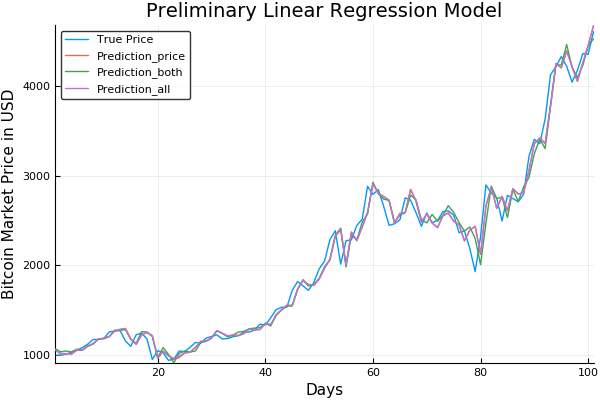

In [6]:
plot_days = 100
plot(y[end-plot_days:end], label="True Price")
plot!((X_price*w_price)[end-plot_days:end], label="Prediction_price")
plot!((X_both*w_both)[end-plot_days:end], label="Prediction_both")
plot!((X_all*w_all)[end-plot_days:end], label="Prediction_all")
plot!(title="Preliminary Linear Regression Model", xlabel="Days", ylabel="Bitcoin Market Price in USD")

In [7]:
for (X, w) in ((X_price, w_price), (X_both, w_both), (X_all, w_all))
    println(mean(abs.(y .- X*w)[1000:end]))
end

27.95827664779767
29.80275683826306
28.66123291169002


[-0.000313554, 0.00372524, -0.00186803, -0.00378333, 0.00548584, -0.00232827, -0.000499595, -0.00145931, -0.00132904, 0.00218711, -0.0012064, 0.00357273, -0.00163573, 0.00915906, -0.00120164, -0.000657269, 6.63887e-5, 0.00356317, -0.00515303, 0.000838449, 0.00132676, 0.0010199, 0.00160512, -0.00165853, 0.000578471, -0.00229812, 0.000823515, 0.000109684, -5.84474e-5, -7.01013e-5, -8.64805e-7, 4.89307e-5, -3.2331e-5, -2.36024e-5, -1.18449e-5, -1.4352e-5, 4.54969e-5, -9.10206e-5, 7.58723e-5, 6.155e-5, -0.000103715, 5.35636e-5, 4.95889e-5, 5.32456e-5, -4.93687e-5, 3.2912e-5, 1.91733e-5, -3.20515e-5, 7.88408e-5, -6.5866e-5, 3.69254e-5, 4.15273e-5, -1.75348e-5, -4.32837e-5, 0.000163502, -9.80232e-5, 0.144699, -0.275108, 0.105639, 0.0185321, 0.101428, -0.0915414, 0.0104768, 0.00158552, -0.0970486, 0.104459, -0.0898265, 0.0963648, -0.103978, 0.0738351, -0.31317, 0.588345, -0.268008, 0.0361385, -0.243098, 0.174227, -0.00137882, -0.0438479, 0.229094, -0.206728, 0.177955, -0.188813, 0.181216, -0.


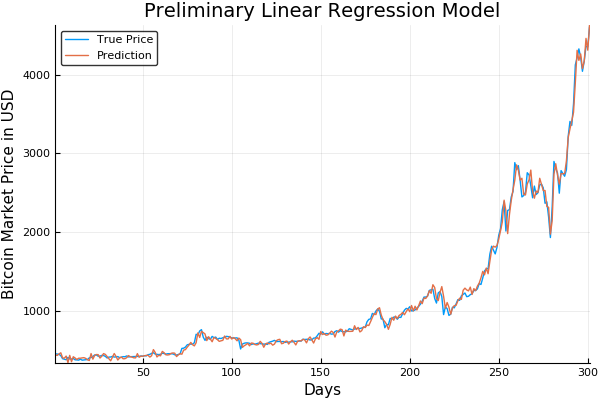

In [41]:
# let's try it with all the features
days = 14
start = 1
X = Array{Float64}(size(data)[1] - start - days + 1, 0)
for feature_name in (:btc_market_price, :btc_trade_volume, :btc_total_bitcoins, :btc_hash_rate, :btc_n_unique_addresses)
    feature = normalize(data[:, feature_name].data)
    historical_feature = historical(feature, days, start)
    feature² = normalize(data[:, feature_name].data .^ 2)
    historical_feature² = historical(feature², days, start)
    X = [X historical_feature historical_feature²]
#     X = [X historical_feature.^2]
end
y = price[start + days : end]
w = X \ y
println(normalize(w))
println(mean((y .- X*w)))

plot_days = 300
plot(y[end-plot_days:end], label="True Price")
plot!((X*w)[end-plot_days:end], label="Prediction")
plot!(title="Preliminary Linear Regression Model", xlabel="Days", ylabel="Bitcoin Market Price in USD")

In [44]:
# test model by predicting tomorrow
X = Array{Float64}()
for feature_name in (:btc_market_price, :btc_trade_volume, :btc_total_bitcoins, :btc_hash_rate, :btc_n_unique_addresses)
    feature = feature[(end-days):end]
    historical_feature = normalize(normalize(feature))
    historical_feature² = normalize(normalize(feature.^2))
    X = [X historical_feature historical_feature²]
end

LoadError: [91mDimensionMismatch("mismatch in dimension 1 (expected 1 got 1567)")[39m


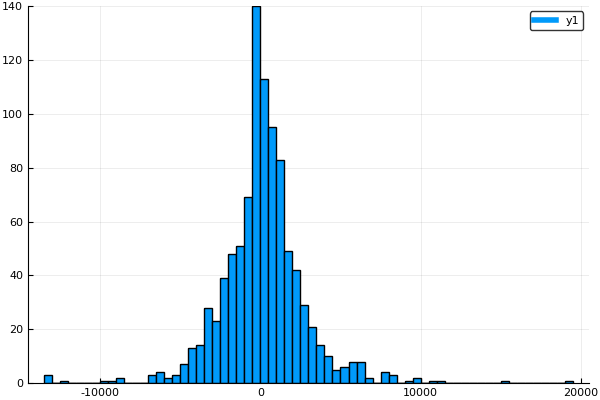

In [28]:
# how many features until linear regression overfits
max_days = 1000
start = 1
mean_error = zeros(max_days)
for days in 1:50:max_days
#     X = Array{Float64}(size(data)[1] - start - days + 1, 0)
    X = historical(norm_price, days)
    y = price[days + 1 : end];
    w = X \ y
    error = mean(abs.((y .- X*w)))
    mean_error[days] = error
end
histogram(w)
# scatter([1:50:max_days], mean_error[1:50:max_days], title="How many features to overfit", label="", xlabel="Number of features", ylabel="Mean Error (USD)")


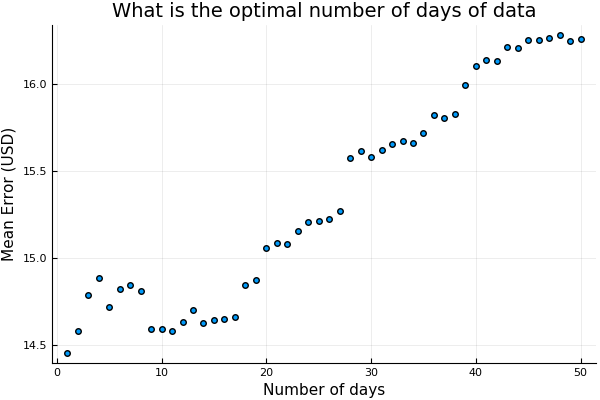

In [11]:
# how many features until linear regression overfits
max_days = 50
start = 1
mean_error = zeros(max_days)
for days in 1:max_days
#     X = historical(norm_price, days)
    X = [historical(norm_price, days) historical(norm_volume, days)]
    y = price[days + 1 : end];
    w = X \ y
    error = mean(abs.((y .- X*w)))
    mean_error[days] = error
end
scatter([1:max_days], mean_error, title="What is the optimal number of days of data", label="", xlabel="Number of days", ylabel="Mean Error (USD)")

In [33]:
X = Array{Float64}
for feature in (:btc)

1×3 Array{Int64,2}:
 1  2  3

In [ ]:
function tomorrow(X, w)
    past = 